# 🛸 Capstone Project - The UFO route 2019





## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 2>
<ul>
    <li>I. <a href="#itemI">Week 1</a>
        <ul>
            <li>1. <a href="#itemI1">Description of the problem and a discussion of the background</a></li>
            <li>2. <a href="#itemI2">Description of the data and how it will be used to solve the problem</a></li>
        </ul>
    </li>
    <li>II. <a href="#itemII">Week 2</a>
        <ul>
            <li>1. <a href="#itemII1">This notebook on your Github repository</a></li>
            <li>2. <a href="#itemII2">Full report with the following components</a>
                <ul>
                    <li>2.1. <a href="#itemII21">Introduction where you discuss the business problem and who would be interested in this project</a></li>
                    <li>2.2. <a href="#itemII22">Data where you describe the data that will be used to solve the problem and the source of the data</a>
                        <ul>
                            <li>2.2.1. <a href="#itemII221">📊 UFO sighting data from Kaggle.com</a></li>
                            <li>2.2.2. <a href="#itemII222">🗺️ Reno & Las Vegas data from Foursquare.com</a></li>
                        </ul>                    
                    </li>
                    <li>2.3. <a href="#itemII23">Methodology section: Main component of the report</a></li>
                    <li>2.4. <a href="#itemII24">Results section where you discuss the results</a></li>
                    <li>2.5. <a href="#itemII25">Discussion section where you discuss any observations you noted and any recommendations you can make based on the results</a></li>
                    <li>2.6. <a href="#itemII26">Conclusion section where you conclude the report</a></li>
                </ul>                
            </li>
            <li>3. <a href="#itemII3">Your choice of a presentation or blogpost</a></li>
            </ul>
    </li>
</ul>

</font>
</div>

<a id='itemI'></a>

# I. Week 1

<a id='itemI1'></a>

## 1. Description of the problem and a discussion of the background. (15 marks)

We are a company that offer travel experiences to anywhere in the world where sightings of unidentified flying objects have been documented.

Our regular clients are professional or amateur photographers, researchers, scientists, graphic journalists, writers and students.

Our trips are made in 5 countries in which unexplained phenomena have been reported in the sky, these are:

- 🐨 Australia
- 🍁 Canada
- 🥨 Germany 
- 👑 United Kingdom
- 👨🏻‍🚀 United States America

For the following season, the marketing department proposed to investigate the documented sightings near **Area 51**, in the state of Nevada in the United States of America.

<a id='itemI2'></a>

## 2. Description of the data and how it will be used to solve the problem. (15 marks)

📊 **__[Kaggle.com](https://www.kaggle.com)__**</br>

Next, using Kaggle.com datasets, we study and identify the geographic areas with the largest number of reported occurrences.

From our research, we identified 2 cities in the **State of Nevada** with the highest concentration of sightings, these are:
 - ⛷️ Reno
 - 🎰 Las Vegas


🗺️ **__[Foursquare.com](https://www.foursquare.com)__**</br>

After our travelers finish the tour around the sighting areas and using Foursquare.com, we find hotels, restaurants and other interesting places to visit.

<a id='itemII'></a>

# II. Week 2

<a id='itemII1'></a>

##  1. This notebook on your Github repository. (15 marks)

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#! pip install geopy
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

#Seaborn
import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.7.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
print('Folium installed and imported!. Version: ', folium.__version__)

from IPython.display import Image

print('Libraries imported.')

Folium installed and imported!. Version:  0.7.0
Libraries imported.


<a id='itemII2'></a>

## 2. Full report with the following components (15 marks):

Next, I describe the components of the report:

<a id='itemII21'></a>

### 2.1. Introduction where you discuss the business problem and who would be interested in this project

We can group our needs into two main objectives, which are:
1. Due to the interest of our clients to take pictures of the sky of the state of Nevada (where is the famous Area 51), we want to find the cities of Nevada near the sighting points.
2. After finding the neighborhoods closest to the sighting points, we need to locate hotels and restaurants.

<a id='itemII22'></a>

### 2.2. Data where you describe the data that will be used to solve the problem and the source of the data

We use data from Kaggle.com and Foursquare.com

<a id='itemII221'></a>

### 2.2.1. 📊 UFO sighting data from Kaggle.com

https://www.kaggle.com/NUFORC/ufo-sightings

In [2]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Date_time                  city state/province country UFO_shape  \
0  10/10/1949 20:30            san marcos             tx      us  cylinder   
1  10/10/1949 21:00          lackland afb             tx     NaN     light   
2  10/10/1955 17:00  chester (uk/england)            NaN      gb    circle   
3  10/10/1956 21:00                  edna             tx      us    circle   
4  10/10/1960 20:00               kaneohe             hi      us     light   

  length_of_encounter_seconds described_duration_of_encounter  \
0                        2700                      45 minutes   
1                        7200                         1-2 hrs   
2                          20                      20 seconds   
3                          20                        1/2 hour   
4                         900                      15 minutes   

                                         description date_documented  \
0  This event took place in early fall around 194...       4/27/2004   
1  1949 Lackland AFB&#44 TX.  Lights racing acros...      12/16/2005   
2  Green/Orange circular disc over Chester&#44 En...       1/21/2008   
3  My older brother and twin sister were leaving ...       1/17/2004   
4  AS a Marine 1st Lt. flying an FJ4B fighter/att...       1/22/2004   

     latitude   longitude  
0  29.8830556  -97.941111  
1    29.38421  -98.581082  
2        53.2   -2.916667  
3  28.9783333  -96.645833  
4  21.4180556 -157.803611

In [3]:
data_ufo.dtypes

Date_time                           object
city                                object
state/province                      object
country                             object
UFO_shape                           object
length_of_encounter_seconds         object
described_duration_of_encounter     object
description                         object
date_documented                     object
latitude                            object
longitude                          float64
dtype: object

In [4]:
data_ufo.shape

(80332, 11)

In [5]:
#Null values
data_ufo_null = data_ufo[data_ufo.isnull().any(axis=1)]
data_ufo_null.head()

Date_time                  city state/province country UFO_shape  \
1   10/10/1949 21:00          lackland afb             tx     NaN     light   
2   10/10/1955 17:00  chester (uk/england)            NaN      gb    circle   
6   10/10/1965 21:00    penarth (uk/wales)            NaN      gb    circle   
18  10/10/1973 23:00           bermuda nas            NaN     NaN     light   
20  10/10/1974 21:30    cardiff (uk/wales)            NaN      gb      disk   

   length_of_encounter_seconds described_duration_of_encounter  \
1                         7200                         1-2 hrs   
2                           20                      20 seconds   
6                          180                    about 3 mins   
18                          20                         20 sec.   
20                        1200                      20 minutes   

                                          description date_documented  \
1   1949 Lackland AFB&#44 TX.  Lights racing acros...      12/16/2005   
2   Green/Orange circular disc over Chester&#44 En...       1/21/2008   
6   penarth uk  circle  3mins  stayed 30ft above m...       2/14/2006   
18  saw fast moving blip on the radar scope thin w...       1/11/2002   
20  back in 1974 I was 19 at the time and  lived i...        2/1/2007   

     latitude  longitude  
1    29.38421 -98.581082  
2        53.2  -2.916667  
6   51.434722  -3.180000  
18  32.364167 -64.678611  
20       51.5  -3.200000

In [6]:
data_ufo_null.shape

(13816, 11)

In [7]:
#Delete null values
data_ufo.dropna()
data_ufo.shape

(80332, 11)

#### UFO sighting by countries

In [8]:
dbar_countries = data_ufo['country'].value_counts()
print(dbar_countries)

us    65114
ca     3000
gb     1905
au      538
de      105
Name: country, dtype: int64


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


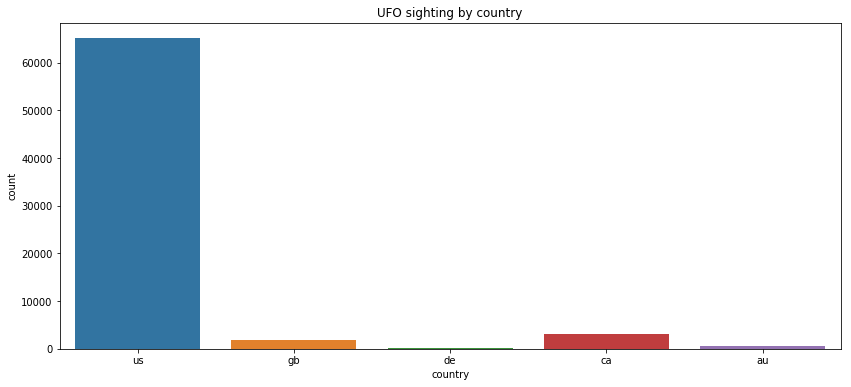

In [9]:
plt.figure(figsize=(14,6))
sns.countplot(data_ufo['country'].sort_values(ascending=False))
plt.title('UFO sighting by country', fontdict=None, loc='center')
plt.show()

<font size = 2>

Countries:

|Rank|Country|Frecuency|
|----|-------|---------|
|1.|👨🏻‍🚀 United States America (US)|65114|
|2.|🍁 Canada (CA)|3000|
|3.|👑 United Kingdom (GB)|1905|
|4.|🐨 Australia (AU)|538|
|5.|🥨 Germany (DE)|105|

</font>

#### UFO sighting at US

In [10]:
data_ufo_us = data_ufo[(data_ufo['country'] =='us')]
data_ufo_us.head()

Date_time        city state/province country UFO_shape  \
0  10/10/1949 20:30  san marcos             tx      us  cylinder   
3  10/10/1956 21:00        edna             tx      us    circle   
4  10/10/1960 20:00     kaneohe             hi      us     light   
5  10/10/1961 19:00     bristol             tn      us    sphere   
7  10/10/1965 23:45     norwalk             ct      us      disk   

  length_of_encounter_seconds described_duration_of_encounter  \
0                        2700                      45 minutes   
3                          20                        1/2 hour   
4                         900                      15 minutes   
5                         300                       5 minutes   
7                        1200                      20 minutes   

                                         description date_documented  \
0  This event took place in early fall around 194...       4/27/2004   
3  My older brother and twin sister were leaving ...       1/17/2004   
4  AS a Marine 1st Lt. flying an FJ4B fighter/att...       1/22/2004   
5  My father is now 89 my brother 52 the girl wit...       4/27/2007   
7  A bright orange color changing to reddish colo...       10/2/1999   

     latitude   longitude  
0  29.8830556  -97.941111  
3  28.9783333  -96.645833  
4  21.4180556 -157.803611  
5      36.595  -82.188889  
7     41.1175  -73.408333

In [11]:
dbar_us_st = data_ufo_us['state/province'].value_counts()
pd.DataFrame(dbar_us_st).T

ca    wa    fl    tx    ny    il    az    pa    oh    mi  \
state/province  8912  3966  3835  3447  2980  2499  2414  2366  2275  1836   

                  or    nc    mo    co    in    va    ma    ga    nj    wi  \
state/province  1747  1740  1458  1413  1288  1273  1256  1255  1255  1232   

                  tn    mn    sc   ct   ky   md   nv   ok   nm   ia   al   ut  \
state/province  1119  1012  1003  892  855  837  803  724  720  678  642  622   

                 ks   ar   la   me   id   nh   mt   wv   ne   ms   ak   hi  \
state/province  613  588  558  558  521  486  478  448  381  375  319  262   

                 vt   ri   sd   wy   de   nd  pr  dc  
state/province  260  228  183  175  166  129  25   7

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


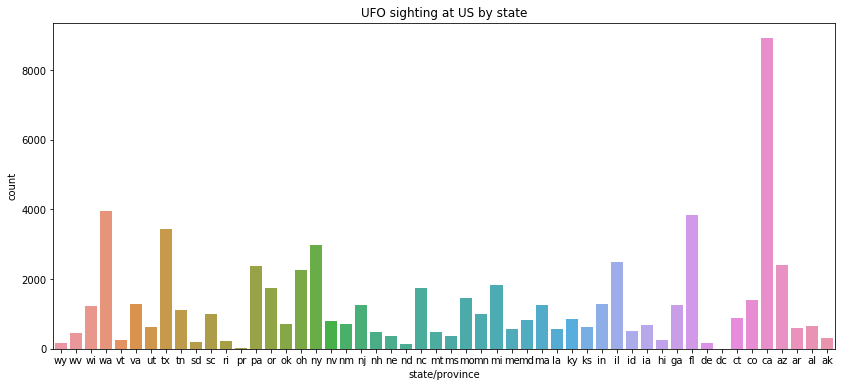

In [12]:
plt.figure(figsize=(14,6)) #ancho y alto
sns.countplot(data_ufo_us['state/province'].sort_values(ascending=False))
plt.title('UFO sighting at US by state', fontdict=None, loc='center')
plt.show()

#### Nevada State, US

In [13]:
# Nevada
lat_NV=39.876019
lon_NV=-117.224121

nv_map = folium.Map(location=[lat_NV,lon_NV], zoom_start=6, width=800, height=600)
nv_map

#### 🛦Area 51, Nevada

In [14]:
# Area 51
lat_51=37.237080
lon_51=-115.871727

a51_map = folium.Map(location=[lat_51,lon_51], zoom_start=9)
folium.Marker(
    location=[lat_51,lon_51], 
    popup= 'Area 51',
    icon=folium.Icon(icon='cloud', color='red')
).add_to(a51_map)

a51_map

In [15]:
data_ufo_nevada = pd.DataFrame(data_ufo.loc[(data_ufo['country'] == 'us') & (data_ufo['state/province'] == 'nv')]).reset_index(drop=True)
data_ufo_nevada.head()

Date_time        city state/province country UFO_shape  \
0  10/10/1998 17:30   las vegas             nv      us     cigar   
1  10/10/1998 17:30   las vegas             nv      us    circle   
2  10/10/1999 21:00      rachel             nv      us     light   
3  10/10/2008 04:00      carlin             nv      us      disk   
4  10/11/1999 21:00  winnemucca             nv      us     cigar   

  length_of_encounter_seconds described_duration_of_encounter  \
0                         600                      10 minutes   
1                        2700                          45min.   
2                       10800                         3 hours   
3                         600                         10 mins   
4                           2                         seconds   

                                         description date_documented  \
0  White&#44 vertical cigar shape floating around...       11/1/1998   
1              Ufo sighting in las vegas near Area51       8/30/1999   
2  Bright lights with incredible agility seen fro...       5/24/2005   
3  Ufo sighting in Carlin&#44 NV&#44 at the pilot...       7/19/2010   
4  oblong&#44 extremely large and  bright object ...      10/19/1999   

     latitude   longitude  
0      36.175 -115.136389  
1      36.175 -115.136389  
2  37.6447222 -115.742778  
3  40.7138889 -116.103056  
4  40.9730556 -117.734722

In [16]:
data_ufo_nevada['length_of_encounter_seconds'] = data_ufo_nevada['length_of_encounter_seconds'].astype(float)
data_ufo_nevada['latitude'] = data_ufo_nevada['latitude'].astype(float)
data_ufo_nevada['latitude'] = data_ufo_nevada['latitude'].astype(float)
data_ufo_nevada.dtypes

Date_time                           object
city                                object
state/province                      object
country                             object
UFO_shape                           object
length_of_encounter_seconds        float64
described_duration_of_encounter     object
description                         object
date_documented                     object
latitude                           float64
longitude                          float64
dtype: object

In [17]:
data_ufo_nevada.shape

(803, 11)

In [18]:
data_ufo_nevada = data_ufo_nevada[['country','state/province','city','UFO_shape','length_of_encounter_seconds','latitude','longitude']]
data_ufo_nevada.head()

country state/province        city UFO_shape  length_of_encounter_seconds  \
0      us             nv   las vegas     cigar                        600.0   
1      us             nv   las vegas    circle                       2700.0   
2      us             nv      rachel     light                      10800.0   
3      us             nv      carlin      disk                        600.0   
4      us             nv  winnemucca     cigar                          2.0   

    latitude   longitude  
0  36.175000 -115.136389  
1  36.175000 -115.136389  
2  37.644722 -115.742778  
3  40.713889 -116.103056  
4  40.973056 -117.734722

In [19]:
data_ufo_nevada=data_ufo_nevada[~data_ufo_nevada['UFO_shape'].isnull()]
# UFO_shape = NaN
data_ufo_nevada[pd.isnull(data_ufo_nevada).any(axis=1)]

Empty DataFrame
Columns: [country, state/province, city, UFO_shape, length_of_encounter_seconds, latitude, longitude]
Index: []

In [20]:
data_ufo_nevada.shape

(778, 7)

#### UFO sighting at Nevada State

In [21]:
for lat_, lon_, city, seconds in zip(data_ufo_nevada['latitude'], data_ufo_nevada['longitude'], 
                                            data_ufo_nevada['city'],
                                            data_ufo_nevada['length_of_encounter_seconds']):
    
    label = 'City: {} | seconds: {}'.format(city, seconds)
    label = folium.Popup(label, parse_html=True)
    
    folium.CircleMarker(
        [lat_, lon_],
        radius=3,
        popup=label,
        color= 'blue',
        fill=True,
        fill_color= 'blue',
        fill_opacity=1
    ).add_to(nv_map)
nv_map

#### 📚 Clustering Nevada locations

In [22]:
data_ufo_nevada.head()

country state/province        city UFO_shape  length_of_encounter_seconds  \
0      us             nv   las vegas     cigar                        600.0   
1      us             nv   las vegas    circle                       2700.0   
2      us             nv      rachel     light                      10800.0   
3      us             nv      carlin      disk                        600.0   
4      us             nv  winnemucca     cigar                          2.0   

    latitude   longitude  
0  36.175000 -115.136389  
1  36.175000 -115.136389  
2  37.644722 -115.742778  
3  40.713889 -116.103056  
4  40.973056 -117.734722

In [23]:
data_ufo_nevada_ll=data_ufo_nevada[['latitude','longitude']]
data_ufo_nevada_ll.head()

latitude   longitude
0  36.175000 -115.136389
1  36.175000 -115.136389
2  37.644722 -115.742778
3  40.713889 -116.103056
4  40.973056 -117.734722

In [24]:
x=data_ufo_nevada_ll['latitude']
y=data_ufo_nevada_ll['longitude']

In [25]:
X=np.array(list(zip(x,y)))

X[0:5]

array([[  36.175    , -115.1363889],
       [  36.175    , -115.1363889],
       [  37.6447222, -115.7427778],
       [  40.7138889, -116.1030556],
       [  40.9730556, -117.7347222]])

#### 🔴↔️🔵 K-Means

In [26]:
# 
n_clusters = 3

kmeans=KMeans(n_clusters=n_clusters)
kmeans=kmeans.fit(X)
labels=kmeans.predict(X)

print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [27]:
centroids=kmeans.cluster_centers_
colors=['m.','r.','c.','b.','y.']

print(centroids)

[[  40.18513207 -116.0772632 ]
 [  36.21324354 -115.16784237]
 [  39.49137706 -119.66651597]]


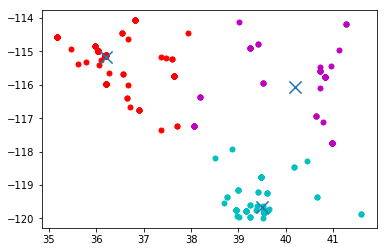

In [28]:
#Plot chart without Folium map
for i in range(len(X)):
    plt.plot(X[i][0],X[i][1], colors[labels[i]], markersize=10)

# centroids
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=150, linewidths=5, zorder=10)

# Show plot
plt.show()

In [29]:
#Cluster values
print(labels)
print(len(labels))

[1 1 1 0 0 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 0 1 2 1 2 1 2 2 1 2 1 1 1 0 1 1 2
 1 1 2 1 1 0 1 1 1 1 0 2 2 1 1 0 1 0 1 1 1 1 2 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 0 1
 1 1 2 1 1 1 1 0 1 2 1 1 0 0 0 2 1 1 2 2 1 0 1 1 0 1 1 1 2 1 1 2 1 1 1 1 1
 1 1 2 1 2 1 1 2 2 2 1 1 2 1 1 2 1 2 1 1 2 1 2 1 2 0 2 2 2 2 1 2 1 0 1 2 1
 1 1 1 0 0 0 2 2 1 1 1 1 1 1 1 2 1 1 0 1 2 1 2 1 1 1 2 1 1 1 1 2 2 2 2 2 0
 1 0 2 0 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 0 0
 1 1 0 1 1 2 1 1 1 1 1 1 2 1 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 2 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 2 1 2 2 2 2 1 1 1 1 1 1 0 0 1 1 2 1 1 2 0 2 1 1 1 1 1 1 1 1 2 1 1 2
 1 1 1 1 2 2 2 1 1 1 2 0 2 1 2 1 1 1 2 1 1 1 1 1 2 1 1 0 1 1 2 1 1 1 1 1 1
 2 1 2 1 0 1 1 1 1 1 1 2 1 1 1 1 2 1 1 2 1 2 2 1 2 2 1 1 1 1 0 1 1 1 2 0 0
 0 0 1 1 1 1 2 1 2 2 2 0 

In [30]:
# Source values
print(X[0:5])
print(len(X))

[[  36.175     -115.1363889]
 [  36.175     -115.1363889]
 [  37.6447222 -115.7427778]
 [  40.7138889 -116.1030556]
 [  40.9730556 -117.7347222]]
778


#### 🔰 Mapping Cluster Table

In [31]:
data_ufo_nevada_clusters = pd.DataFrame([data_ufo_nevada_ll.index,data_ufo_nevada_ll['latitude'],
                                         data_ufo_nevada_ll['longitude'],labels]).T
data_ufo_nevada_clusters.columns = ['last_index', 'latitude', 'longitude', 'cluster_group']

data_ufo_nevada_clusters['last_index'] = data_ufo_nevada_clusters.last_index.astype(int)
data_ufo_nevada_clusters['cluster_group'] = data_ufo_nevada_clusters.cluster_group.astype(int)

data_ufo_nevada_clusters.head()

last_index   latitude   longitude  cluster_group
0           0  36.175000 -115.136389              1
1           1  36.175000 -115.136389              1
2           2  37.644722 -115.742778              1
3           3  40.713889 -116.103056              0
4           4  40.973056 -117.734722              0

In [32]:
data_ufo_nevada_clusters.shape

(778, 4)

In [33]:
rainbow = ['#335BFF','#DE0B28', '#80ffb4', '#ff0000', '#F1C40F']
data_ufo_nevada_clusters.dtypes

last_index         int64
latitude         float64
longitude        float64
cluster_group      int64
dtype: object

In [34]:
ufo_map_nevada_map = folium.Map(location=[lat_NV,lon_NV], zoom_start=6)
ufo_map_nevada_clusters = folium.map.FeatureGroup()

for lat_, lon_, cluster in zip(data_ufo_nevada_clusters['latitude'], 
                               data_ufo_nevada_clusters['longitude'],
                               data_ufo_nevada_clusters['cluster_group']):
    
    label = 'Cluster: {}'.format(cluster)
    label = folium.Popup(label, parse_html=True)
    
    folium.CircleMarker(
        [lat_, lon_],
        radius=3,
        popup=label,
        color= rainbow[cluster-1],
        fill=True,
        fill_color= rainbow[cluster-1],
        fill_opacity=1
    ).add_to(ufo_map_nevada_map)


ufo_map_nevada_map

#### 🎯 Mapping Centroids in Cluster Table

In [35]:
n=0
for row in centroids:
    la=row[0]
    lo=row[1]
    label2= 'Centroid cluster: {}'.format(n)
    label2 = folium.Popup(label2, parse_html=True)
    folium.Circle(
        [la, lo],
        radius=100000,
        popup=label2,
        color= '#009900',
        fill=True,
        fill_color= rainbow[cluster-1],#'#009900',
        fill_opacity=0.1
    ).add_to(ufo_map_nevada_map)
    n=n+1
    
ufo_map_nevada_map

#### ⛷️ Reno City, NV

In [36]:
# Reno
lat_Re=39.52927
lon_Re=-119.8136744

ufo_map_nevada_map.location=[lat_Re,lon_Re]
ufo_map_nevada_map.zoom_start=9
ufo_map_nevada_map

#### 🎰 Las Vegas City, NV

In [37]:
# Las Vegas
lat_VE=36.1662859
lon_VE=-115.149225

ufo_map_nevada_map.location=[lat_VE,lon_VE]
ufo_map_nevada_map.zoom_start=9
ufo_map_nevada_map

<a id='itemII222'></a>

### 2.2.2. 🗺️ Reno & Las Vegas data from Foursquare.com

#### Define Foursquare Credentials and Version

In [38]:
#CLIENT_ID = 'your-client-ID' # your Foursquare ID
#CLIENT_SECRET = 'your-client-secret' # your Foursquare Secret

CLIENT_ID = 'ZFKLYJXKXTAYKUCHPGQ0J10WY4F0D4XCDUX3P0KW3BHA3GKI' # your Foursquare ID
CLIENT_SECRET = '3ZTDEP4OA0D0PSZRA4EPZENOX3BI2NSNACSA3KGWI25JWE1E' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: ZFKLYJXKXTAYKUCHPGQ0J10WY4F0D4XCDUX3P0KW3BHA3GKI
CLIENT_SECRET:3ZTDEP4OA0D0PSZRA4EPZENOX3BI2NSNACSA3KGWI25JWE1E


### Looking for recommended hotels and restaurants in the cities of Reno and Las Vegas


|Looking for     | ⛷️ Reno | 🎰 Las Vegas|
|----------------|---------|--------------|
| 🏨 Hotels     |     ▫     |    ▫         |
| 🍽️ Restaurants|     ▫     |     ▫        |



### ⛷️ Reno City, NV

In [39]:
# Manu Code
city1 = 'Reno, NV'

geolocator = Nominatim(user_agent='0')
location_RE = geolocator.geocode(city1)
latitude_RE = location_RE.latitude
longitude_RE = location_RE.longitude
print('The geograpical coordinate of Reno City are {}, {}.'.format(latitude_RE, longitude_RE))

The geograpical coordinate of Reno City are 39.52927, -119.8136744.


#### Venues in Reno City

In [40]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 2000 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_RE, 
    longitude_RE, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=ZFKLYJXKXTAYKUCHPGQ0J10WY4F0D4XCDUX3P0KW3BHA3GKI&client_secret=3ZTDEP4OA0D0PSZRA4EPZENOX3BI2NSNACSA3KGWI25JWE1E&v=20180605&ll=39.52927,-119.8136744&radius=2000&limit=100'

In [41]:
results_RE = requests.get(url).json()
results_RE

{'meta': {'code': 200, 'requestId': '5c3954f59fb6b72660a5d64d'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4b940b78f964a520c36334e3-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/government_monument_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d12d941735',
         'name': 'Monument / Landmark',
         'pluralName': 'Monuments / Landmarks',
         'primary': True,
         'shortName': 'Landmark'}],
       'id': '4b940b78f964a520c36334e3',
       'location': {'address': 'N. Virginia St.',
        'cc': 'US',
        'city': 'Reno',
        'country': 'United States',
        'crossStreet': 'W. Commercial Row',
        'distance': 123,
        'formattedAddress': ['N. Virginia St. (W. Commercial Row)',
         'Reno, NV 89501',
      

The get_category_type function from the Foursquare lab

In [42]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

We are ready to clean the json and structure it into a pandas dataframe.

In [43]:
venues = results_RE['response']['groups'][0]['items']
    
nearby_venues_RE = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_RE =nearby_venues_RE.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_RE['venue.categories'] = nearby_venues_RE.apply(get_category_type, axis=1)

# clean columns
nearby_venues_RE.columns = [col.split(".")[-1] for col in nearby_venues_RE.columns]

nearby_venues_RE.head()

name           categories        lat         lng
0                  The Reno Arch  Monument / Landmark  39.528163 -119.813741
1           Greater Nevada Field     Baseball Stadium  39.528151 -119.808478
2           Louis' Basque Corner   Spanish Restaurant  39.530720 -119.810218
3     National Automobile Museum       History Museum  39.526077 -119.808834
4  Sterling's Seafood Steakhouse   Seafood Restaurant  39.530384 -119.815159

In [44]:
pd.DataFrame(nearby_venues_RE['categories'].value_counts()).T

Coffee Shop  Brewery  Mexican Restaurant  Pub  Bar  Pizza Place  \
categories            5        5                   5    5    4            4   

            Breakfast Spot  Café  Hotel  Seafood Restaurant  Sushi Restaurant  \
categories               4     4      4                   2                 2   

            Gastropub  Bakery  New American Restaurant  Deli / Bodega  \
categories          2       2                        2              2   

            Steakhouse  Cocktail Bar  American Restaurant  Wine Bar  \
categories           2             2                    2         2   

            Vietnamese Restaurant  Korean Restaurant  Restaurant  \
categories                      2                  1           1   

            Clothing Store  Juice Bar  Thai Restaurant  Gym / Fitness Center  \
categories               1          1                1                     1   

            Soup Place  Beer Bar  Burrito Place  Burger Joint  Sandwich Place  \
categories           1         1              1             1               1   

            History Museum  BBQ Joint  Jewelry Store  Bookstore  Antique Shop  \
categories               1          1              1          1             1   

            Monument / Landmark  Baseball Stadium  Theater  Lounge  \
categories                    1                 1        1       1   

            Chinese Restaurant  French Restaurant  Spanish Restaurant  \
categories                   1                  1                   1   

            Art Museum  Gay Bar  Art Gallery  Movie Theater  Grocery Store  \
categories           1        1            1              1              1   

            Tea Room  Dive Bar  Science Museum  Vegetarian / Vegan Restaurant  \
categories         1         1               1                              1   

            Tapas Restaurant  Stadium  Japanese Restaurant  \
categories                 1        1                    1   

            Mediterranean Restaurant  Trail  Furniture / Home Store  
categories                         1      1                       1

How many venues were returned by Foursquare?

In [45]:
print('At Reno City, NV: {} venues were returned by Foursquare.'.format(nearby_venues_RE.shape[0]))

At Reno City, NV: 100 venues were returned by Foursquare.


In [46]:
restaurant_reno = nearby_venues_RE[nearby_venues_RE['categories'].str.contains('Restaurant')]
restaurant_reno

name                     categories  \
2                       Louis' Basque Corner             Spanish Restaurant   
4              Sterling's Seafood Steakhouse             Seafood Restaurant   
9   Ichiban Japanese Steak House & Sushi Bar            Japanese Restaurant   
10                          Thai Corner Cafe                Thai Restaurant   
19                   Antonio's Mexican Grill             Mexican Restaurant   
21                             101 Taiwanese             Chinese Restaurant   
22                    The Habit Burger Grill                     Restaurant   
26                       Beto's Mexican Food             Mexican Restaurant   
27                The Buffet at the Eldorado            American Restaurant   
30                                  The Eddy        New American Restaurant   
41                                    Centro               Tapas Restaurant   
42                                  Bab Café              Korean Restaurant   
47                             Golden Flower          Vietnamese Restaurant   
52             Pho 777 Vietnamese Restaurant          Vietnamese Restaurant   
62                         Reef Sushi & Sake               Sushi Restaurant   
63                         Wild River Grille        New American Restaurant   
66                                Sushi Sake               Sushi Restaurant   
76                       Roberto's Taco Shop             Mexican Restaurant   
77                  Pearl Oyster Bar & Grill             Seafood Restaurant   
78                      Laughing Planet Café  Vegetarian / Vegan Restaurant   
83       Bertha Miranda's Mexican Restaurant             Mexican Restaurant   
86                                Crème Cafe              French Restaurant   
87                              Midtown Eats            American Restaurant   
88                    Chuy's Mexican Kitchen             Mexican Restaurant   
97                            Shawarmageddon       Mediterranean Restaurant   

          lat         lng  
2   39.530720 -119.810218  
4   39.530384 -119.815159  
9   39.527045 -119.813123  
10  39.526600 -119.814729  
19  39.525363 -119.814252  
21  39.529972 -119.820286  
22  39.531674 -119.815713  
26  39.529984 -119.822265  
27  39.529119 -119.814392  
30  39.524529 -119.813280  
41  39.520003 -119.813636  
42  39.528164 -119.817149  
47  39.530881 -119.817439  
52  39.527307 -119.811674  
62  39.524875 -119.813626  
63  39.524610 -119.812996  
66  39.529638 -119.815151  
76  39.535060 -119.816103  
77  39.530392 -119.815103  
78  39.518490 -119.810237  
83  39.525542 -119.807102  
86  39.518294 -119.809704  
87  39.517875 -119.809186  
88  39.518243 -119.808856  
97  39.525041 -119.819588

In [47]:
restaurant_reno.shape

(25, 4)

In [48]:
hotels_reno = nearby_venues_RE[nearby_venues_RE['categories'].str.contains('Hotel')]
hotels_reno

name categories        lat         lng
14             Eldorado Resort Casino      Hotel  39.529440 -119.814490
28    Renaissance Reno Downtown Hotel      Hotel  39.525334 -119.810046
67  Circus Circus Reno Hotel & Casino      Hotel  39.532139 -119.815328
74                 Whitney Peak Hotel      Hotel  39.528080 -119.813880

In [49]:
hotels_reno.shape

(4, 4)

In [50]:
# Reno
lat_Re=39.52927
lon_Re=-119.8136744
ufo_map_nevada_reno = folium.Map(location=[lat_Re,lon_Re], zoom_start=15)

for lat_, lon_, name in zip(hotels_reno['lat'],
                            hotels_reno['lng'],
                            hotels_reno['name']                            
                           ):
    
    label = 'Hotel: {}'.format(name)
    label = folium.Popup(label, parse_html=True)
    
    folium.CircleMarker(
        [lat_, lon_],
        radius=3,
        popup=label,
        color= 'red',
        fill=True,
        fill_color= 'red',
        fill_opacity=1
    ).add_to(ufo_map_nevada_reno)


for lat_, lon_, name in zip(restaurant_reno['lat'],
                            restaurant_reno['lng'],
                            restaurant_reno['name']                            
                           ):
    
    label = 'Restaurant: {}'.format(name)
    label = folium.Popup(label, parse_html=True)
    
    folium.CircleMarker(
        [lat_, lon_],
        radius=3,
        popup=label,
        color= 'blue',
        fill=True,
        fill_color= 'blue',
        fill_opacity=1
    ).add_to(ufo_map_nevada_reno)    

ufo_map_nevada_reno

### 🏨⛷️ Recommended hotels in Reno City, NV 🔴

In [51]:
hotels_reno

name categories        lat         lng
14             Eldorado Resort Casino      Hotel  39.529440 -119.814490
28    Renaissance Reno Downtown Hotel      Hotel  39.525334 -119.810046
67  Circus Circus Reno Hotel & Casino      Hotel  39.532139 -119.815328
74                 Whitney Peak Hotel      Hotel  39.528080 -119.813880

### 🍽️⛷️ Recommended restaurants in Reno City, NV 🔵

In [52]:
restaurant_reno

name                     categories  \
2                       Louis' Basque Corner             Spanish Restaurant   
4              Sterling's Seafood Steakhouse             Seafood Restaurant   
9   Ichiban Japanese Steak House & Sushi Bar            Japanese Restaurant   
10                          Thai Corner Cafe                Thai Restaurant   
19                   Antonio's Mexican Grill             Mexican Restaurant   
21                             101 Taiwanese             Chinese Restaurant   
22                    The Habit Burger Grill                     Restaurant   
26                       Beto's Mexican Food             Mexican Restaurant   
27                The Buffet at the Eldorado            American Restaurant   
30                                  The Eddy        New American Restaurant   
41                                    Centro               Tapas Restaurant   
42                                  Bab Café              Korean Restaurant   
47                             Golden Flower          Vietnamese Restaurant   
52             Pho 777 Vietnamese Restaurant          Vietnamese Restaurant   
62                         Reef Sushi & Sake               Sushi Restaurant   
63                         Wild River Grille        New American Restaurant   
66                                Sushi Sake               Sushi Restaurant   
76                       Roberto's Taco Shop             Mexican Restaurant   
77                  Pearl Oyster Bar & Grill             Seafood Restaurant   
78                      Laughing Planet Café  Vegetarian / Vegan Restaurant   
83       Bertha Miranda's Mexican Restaurant             Mexican Restaurant   
86                                Crème Cafe              French Restaurant   
87                              Midtown Eats            American Restaurant   
88                    Chuy's Mexican Kitchen             Mexican Restaurant   
97                            Shawarmageddon       Mediterranean Restaurant   

          lat         lng  
2   39.530720 -119.810218  
4   39.530384 -119.815159  
9   39.527045 -119.813123  
10  39.526600 -119.814729  
19  39.525363 -119.814252  
21  39.529972 -119.820286  
22  39.531674 -119.815713  
26  39.529984 -119.822265  
27  39.529119 -119.814392  
30  39.524529 -119.813280  
41  39.520003 -119.813636  
42  39.528164 -119.817149  
47  39.530881 -119.817439  
52  39.527307 -119.811674  
62  39.524875 -119.813626  
63  39.524610 -119.812996  
66  39.529638 -119.815151  
76  39.535060 -119.816103  
77  39.530392 -119.815103  
78  39.518490 -119.810237  
83  39.525542 -119.807102  
86  39.518294 -119.809704  
87  39.517875 -119.809186  
88  39.518243 -119.808856  
97  39.525041 -119.819588

### 🎰 Las Vegas City, NV

In [53]:
# Manu Code
city2 = 'Las Vegas, NV'

geolocator = Nominatim(user_agent='0')
location_LV = geolocator.geocode(city2)
latitude_LV = location_LV.latitude
longitude_LV = location_LV.longitude
print('The geograpical coordinate of Las Vegas City are {}, {}.'.format(latitude_LV, longitude_LV))

The geograpical coordinate of Las Vegas City are 36.1662859, -115.149225.


#### Venues in Las Vegas City

In [54]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 2000 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_LV, 
    longitude_LV, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=ZFKLYJXKXTAYKUCHPGQ0J10WY4F0D4XCDUX3P0KW3BHA3GKI&client_secret=3ZTDEP4OA0D0PSZRA4EPZENOX3BI2NSNACSA3KGWI25JWE1E&v=20180605&ll=36.1662859,-115.149225&radius=2000&limit=100'

In [55]:
results_LV = requests.get(url).json()
results_LV

{'meta': {'code': 200, 'requestId': '5c3954f7db04f57d9266eea1'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4b870646f964a5200dac31e3-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/performingarts_theater_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d137941735',
         'name': 'Theater',
         'pluralName': 'Theaters',
         'primary': True,
         'shortName': 'Theater'}],
       'id': '4b870646f964a5200dac31e3',
       'location': {'address': '361 Symphony Park Ave',
        'cc': 'US',
        'city': 'Las Vegas',
        'country': 'United States',
        'distance': 382,
        'formattedAddress': ['361 Symphony Park Ave',
         'Las Vegas, NV 89106',
         'United States'],
        'labeledLatLngs': [{'label

We are ready to clean the json and structure it into a pandas dataframe.

In [56]:
venues = results_LV['response']['groups'][0]['items']
    
nearby_venues_LV = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_LV =nearby_venues_LV.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_LV['venue.categories'] = nearby_venues_LV.apply(get_category_type, axis=1)

# clean columns
nearby_venues_LV.columns = [col.split(".")[-1] for col in nearby_venues_RE.columns]

nearby_venues_LV

name  \
0      The Smith Center for the Performing Arts   
1                   Discovery Children's Museum   
2                                      MTO Café   
3                              Eclipse Theaters   
4                                  Pop Up Pizza   
5                      Golden Nugget Rush Tower   
6        The Smith Center, Cabaret Jazz Theater   
7                                 Reynolds Hall   
8                        The Cheesecake Factory   
9                                  The Goodwich   
10                       Chart House Restaurant   
11                   El Sombrero Mexican Bistro   
12                                    Hugo Boss   
13                               Carson Kitchen   
14                           Hash House A Go Go   
15                       Mingo Kitchen & Lounge   
16                         Coach Factory Outlet   
17                                   VegeNation   
18                                   Pizza Rock   
19              Joe Vicari's Andiamo Steakhouse   
20                          Michael Kors Outlet   
21                                Chicago Joe's   
22              Las Vegas North Premium Outlets   
23                       Downtown Cocktail Room   
24                   Amorino Gelato Al Naturale   
25                        The North Face Outlet   
26                                         eat.   
27                                      Le Thai   
28                   Vic & Anthony's Steakhouse   
29                                Hugo's Cellar   
30                               Banger Brewing   
31                        Vesta Coffee Roasters   
32                          Salvatore Ferragamo   
33                 Golden Nugget Hotel & Casino   
34                              Park on Fremont   
35                               The Mob Museum   
36                             Rachel's Kitchen   
37                             Cornish Pasty Co   
38                          Cheffini's Hot Dogs   
39                                      Eureka!   
40  Las Vegas Pride: Freemont Street Experience   
41                              Banana Republic   
42            Rick's Rollin' Smoke BBQ & Tavern   
43                           Marc Jacobs Outlet   
44                              Don't Tell Mama   
45                                  Shake Shack   
46                      Downtown Container Park   
47                                         Bose   
48                                 Disney Store   
49                LONGBAR at the D Casino Hotel   
50           Oak & Ivy: An American Whiskey Den   
51                          Tory Burch - Outlet   
52                                       Le Pho   
53                             Hop Nuts Brewing   
54                              Vanguard Lounge   
55                        adidas Factory Outlet   
56                   kate spade new york outlet   
57                                 Under Armour   
58                             The Arts Factory   
59                                     Artifice   
60                                 Kenneth Cole   
61                             Fukuburger Truck   
62                             Esther's Kitchen   
63                   DTF ( Downtown Fremont St)   
64                                 ASICS Outlet   
65                             The Laundry Room   
66                              The PUMA Outlet   
67                 Lola's - A Louisiana Kitchen   
68                 The D Las Vegas Casino Hotel   
69                               Tommy Hilfiger   
70                             Velveteen Rabbit   
71              Polo Ralph Lauren Factory Store   
72                                 Oakley Vault   
73                         Tenaya Creek Brewery   
74                                  Bocho Sushi   
75                           Godiva Chocolatier   
76                                       Hurley   
77                               Emergency Arts   
78            

In [57]:
pd.DataFrame(nearby_venues_LV['categories'].value_counts()).T

Clothing Store  Bar  Sporting Goods Shop  American Restaurant  \
categories               8    6                    4                    3   

            Cocktail Bar  Women's Store  Brewery  Steakhouse  Gastropub  \
categories             3              3        3           3          3   

            Pizza Place  Breakfast Spot  Boutique  Accessories Store  Casino  \
categories            3               3         3                  2       2   

            Lounge  Burger Joint  Art Gallery  Italian Restaurant  \
categories       2             2            2                   2   

            Coffee Shop  Theater  Mexican Restaurant  Arts & Crafts Store  \
categories            2        2                   2                    1   

            Men's Store  Cajun / Creole Restaurant  English Restaurant  \
categories            1                          1                   1   

            Public Art  Concert Hall  Electronics Store  Sushi Restaurant  \
categories           1             1                  1                 1   

            Outlet Mall  Toy / Game Store  Sandwich Place  History Museum  \
categories            1                 1               1               1   

            Seafood Restaurant  Fast Food Restaurant  Street Fair  BBQ Joint  \
categories                   1                     1            1          1   

            Museum  Thai Restaurant  Hotel  Vegetarian / Vegan Restaurant  \
categories       1                1      1                              1   

            Restaurant  Asian Restaurant  Movie Theater  Outlet Store  Diner  \
categories           1                 1              1             1      1   

            Gay Bar  Piano Bar  Speakeasy  Dive Bar  Ice Cream Shop  \
categories        1          1          1         1               1   

            Food Truck  Shoe Store  Chocolate Shop  Hotel Bar  \
categories           1           1               1          1   

            Vietnamese Restaurant  Shopping Mall  Hot Dog Joint  
categories                      1              1              1

How many venues were returned by Foursquare?

In [58]:
print('At Las Vegas City, NV: {} venues were returned by Foursquare.'.format(nearby_venues_LV.shape[0]))

At Las Vegas City, NV: 100 venues were returned by Foursquare.


In [59]:
restaurant_LV = nearby_venues_LV[nearby_venues_LV['categories'].str.contains('Restaurant')]
restaurant_LV

name                     categories        lat  \
8         The Cheesecake Factory            American Restaurant  36.166072   
10        Chart House Restaurant             Seafood Restaurant  36.170096   
11    El Sombrero Mexican Bistro             Mexican Restaurant  36.162773   
17                    VegeNation  Vegetarian / Vegan Restaurant  36.167398   
21                 Chicago Joe's             Italian Restaurant  36.160980   
27                       Le Thai                Thai Restaurant  36.168839   
36              Rachel's Kitchen                     Restaurant  36.169997   
37              Cornish Pasty Co             English Restaurant  36.158601   
39                       Eureka!            American Restaurant  36.168976   
52                        Le Pho          Vietnamese Restaurant  36.164281   
62              Esther's Kitchen             Italian Restaurant  36.157538   
67  Lola's - A Louisiana Kitchen      Cajun / Creole Restaurant  36.158569   
74                   Bocho Sushi               Sushi Restaurant  36.167797   
78           Triple George Grill            American Restaurant  36.171804   
79                     La Comida             Mexican Restaurant  36.168507   
82                  Flock & Fowl               Asian Restaurant  36.170334   
98                  White Castle           Fast Food Restaurant  36.170059   

           lng  
8  -115.157329  
10 -115.144961  
11 -115.151394  
17 -115.139421  
21 -115.147946  
27 -115.139921  
36 -115.140037  
37 -115.152934  
39 -115.139580  
52 -115.146647  
62 -115.152859  
67 -115.157928  
74 -115.140322  
78 -115.142159  
79 -115.139853  
82 -115.139672  
98 -115.141703

In [60]:
restaurant_LV.shape

(17, 4)

In [61]:
hotels_LV = nearby_venues_LV[nearby_venues_LV['categories'].str.contains('Hotel')]
hotels_LV

name categories        lat         lng
5        Golden Nugget Rush Tower      Hotel  36.170300 -115.145957
49  LONGBAR at the D Casino Hotel  Hotel Bar  36.169804 -115.142873

In [62]:
hotels_LV.shape

(2, 4)

In [63]:
# Las Vegas
lat_LV=36.1662859
lon_LV=-115.149225

ufo_map_nevada_LV = folium.Map(location=[lat_LV,lon_LV], zoom_start=15)

for lat_, lon_, name in zip(hotels_LV['lat'],
                            hotels_LV['lng'],
                            hotels_LV['name']                            
                           ):
    
    label = 'Hotel: {}'.format(name)
    label = folium.Popup(label, parse_html=True)
    
    folium.CircleMarker(
        [lat_, lon_],
        radius=3,
        popup=label,
        color= 'red',
        fill=True,
        fill_color= 'red',
        fill_opacity=1
    ).add_to(ufo_map_nevada_LV)


for lat_, lon_, name in zip(restaurant_LV['lat'],
                            restaurant_LV['lng'],
                            restaurant_LV['name']                            
                           ):
    
    label = 'Restaurant: {}'.format(name)
    label = folium.Popup(label, parse_html=True)
    
    folium.CircleMarker(
        [lat_, lon_],
        radius=3,
        popup=label,
        color= 'blue',
        fill=True,
        fill_color= 'blue',
        fill_opacity=1
    ).add_to(ufo_map_nevada_LV)    

ufo_map_nevada_LV

### 🏨🎰 Recommended hotels in Las Vegas City, NV 🔴

In [64]:
hotels_LV

name categories        lat         lng
5        Golden Nugget Rush Tower      Hotel  36.170300 -115.145957
49  LONGBAR at the D Casino Hotel  Hotel Bar  36.169804 -115.142873

### 🍽️🎰 Recommended restaurants in Las Vegas City, NV 🔵

In [65]:
restaurant_LV

name                     categories        lat  \
8         The Cheesecake Factory            American Restaurant  36.166072   
10        Chart House Restaurant             Seafood Restaurant  36.170096   
11    El Sombrero Mexican Bistro             Mexican Restaurant  36.162773   
17                    VegeNation  Vegetarian / Vegan Restaurant  36.167398   
21                 Chicago Joe's             Italian Restaurant  36.160980   
27                       Le Thai                Thai Restaurant  36.168839   
36              Rachel's Kitchen                     Restaurant  36.169997   
37              Cornish Pasty Co             English Restaurant  36.158601   
39                       Eureka!            American Restaurant  36.168976   
52                        Le Pho          Vietnamese Restaurant  36.164281   
62              Esther's Kitchen             Italian Restaurant  36.157538   
67  Lola's - A Louisiana Kitchen      Cajun / Creole Restaurant  36.158569   
74                   Bocho Sushi               Sushi Restaurant  36.167797   
78           Triple George Grill            American Restaurant  36.171804   
79                     La Comida             Mexican Restaurant  36.168507   
82                  Flock & Fowl               Asian Restaurant  36.170334   
98                  White Castle           Fast Food Restaurant  36.170059   

           lng  
8  -115.157329  
10 -115.144961  
11 -115.151394  
17 -115.139421  
21 -115.147946  
27 -115.139921  
36 -115.140037  
37 -115.152934  
39 -115.139580  
52 -115.146647  
62 -115.152859  
67 -115.157928  
74 -115.140322  
78 -115.142159  
79 -115.139853  
82 -115.139672  
98 -115.141703


|Looking for       | ⛷️ Reno  | 🎰 Las Vegas|
|------------------|-----------|--------------|
| 🏨 Hotels🔴     |     4     |    2         |
| 🍽️ Restaurants🔵|     25     |     17        |

<a id='itemII23'></a>

### 2.3. Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, and what machine learnings were used and why.

**1. Business understanding:**

During this stage the need of the business was identified which was to identify the hotels and restaurants near the places of sightings in the state of Nevada in the United States of America.


**2. Analytic approach:**

For this stage it has only been considered to use the dataset about sightings of UFOs of Kaggle and the data of the cities obtained in Foursquare. From both sources, only data concerning the state of Nevada has been analyzed.


**3. Data requirements:**

The data has been imported from its origins in CSV formats. 


**4. Data collection:**

In addition to the data obtained in Kaggle and Foursquare, other data sources were not necessary.


**5. Data understanding:**

Considering the imported data, the most valuable were the coordinates (latitude and longitude) of the described places, either of the places of sightings or of the hotels and restaurants located.


**6. Data preparation:**

The rows with null values were eliminated and the data types of each column were adapted to be able to process them.


**7. Modeling:**

Para identificar la densidad de las ubicaciones se utilizó el método de agrupamiento k-means.

<a id='itemII24'></a>

### 2.4. Results section where you discuss the results.

In the analysis of the data, the following were identified:

- The country with the highest number of sightings is the United States of America.
- The state of the USA with the highest number of sightings is California with 13%, followed by the state of Washington with 6.09%, Florida with 5.89%. Nevada only represents 1.23% of the total.
- Of the data of sightings corresponding to Nevada, when executing K-means with 3 clusters, 2 centroids were located near the cities of Reno and Las Vegas, the third centroid appeared in the northeast of Nevada, far from any city.
- For Reno city, with a radius of 2000, 4 hotels and 25 restaurants were found.
- For Las Vegas city, with a radius of 2000, 2 hotels and 17 restaurants were found.

<a id='itemII25'></a>

### 2.5. Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.

- I recommend running the K-Means command with a larger number of clusters to identify a larger number of centroids and, consequently, a larger number of cities.
- I also recommend expanding the value of the range of data obtained on Foursquare because we obtained a small number of hotels.

<a id='itemII26'></a>

### 2.6. Conclusion section where you conclude the report.

- The data obtained in Kaggle are not necessarily reliable, however, they allow to study in various scientific fields.
- The data obtained from Foursquare allow to find necessary places for travelers.
- Area 51 is a military location that does not allow to be visited by tourists, however, you can visit the surrounding areas and other tourist sites.

<a id='itemII3'></a>

## 3. Your choice of a presentation or blogpost. (10 marks)

See the presentation file.